# Hough Transform


In [147]:
import cv2 as cv
import matplotlib.pyplot as plt

In [138]:
# Read image
im = cv.imread("testHough.jpg")

# TODO: Check the median filter (pdf states 2D median filter)

# 2D median filter
im_median = cv.medianBlur(im, 7)

# Edge detection using Canny
t_lower = 100
t_upper = 200
aperature_size = 3
l2_gradient = False

edges = cv.Canny(im_median, t_lower, t_upper, apertureSize=aperature_size, L2gradient=l2_gradient)

# ROI selection (region of interest) - only the bottom half of the image
roi = np.zeros_like(edges)
roi[edges.shape[0]//2:,:] = edges[edges.shape[0]//2:,:]

# Hough transform
rho = 1
theta = np.pi/180
threshold = 15
min_line_length = 30
max_line_gap = 20

lines = cv.HoughLinesP(roi, rho, theta, threshold, np.array([]), minLineLength=min_line_length, maxLineGap=max_line_gap)

# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(im, (x1, y1), (x2, y2), (0, 255, 0), 2)


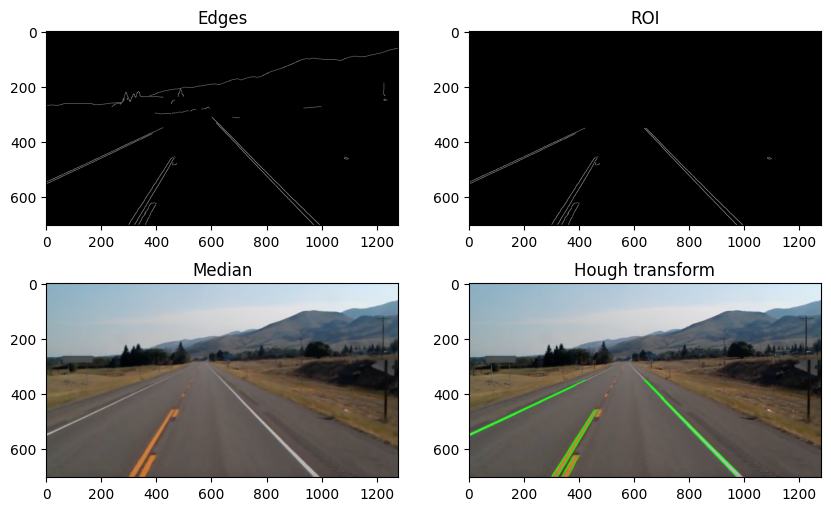

In [146]:
# Display images
plt.figure(figsize=(10,6))
plt.subplot(2, 2, 1)
plt.imshow(edges, cmap="gray")
plt.title("Edges")

plt.subplot(2, 2, 2)
plt.imshow(roi , cmap="gray")
plt.title("ROI")

plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(im_median, cv.COLOR_BGR2RGB))
plt.title("Median")
plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.title("Hough transform")

plt.show()

